In [2]:
"""import os
import numpy as np
import pandas as pd
from keras.preprocessing import image
import keras.applications.resnet50 as resnet50
import keras.applications.xception as xception
import keras.applications.inception_v3 as inception_v3
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

%matplotlib inline"""

'import os\nimport numpy as np\nimport pandas as pd\nfrom keras.preprocessing import image\nimport keras.applications.resnet50 as resnet50\nimport keras.applications.xception as xception\nimport keras.applications.inception_v3 as inception_v3\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nfrom PIL import Image\n\nsns.set_style("whitegrid")\nsns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})\n\n%matplotlib inline'

In [2]:
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
xception_model = xception.Xception(weights='imagenet')

In [3]:
import cv2
def image_classify(model, pak, img, top_n=3):
    """Classify image and return top matches."""
    target_size = (224, 224)
    if img.size != target_size:
        img = img.resize(target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = pak.preprocess_input(x)
    preds = model.predict(x)
    return pak.decode_predictions(preds, top=top_n)[0]


def plot_preds(img, preds_arr):
    """Plot image and its prediction."""
    sns.set_color_codes('pastel')
    f, axarr = plt.subplots(1, len(preds_arr) + 1, figsize=(20, 5))
    axarr[0].imshow(img)
    axarr[0].axis('off')
    for i in range(len(preds_arr)):
        _, x_label, y_label = zip(*(preds_arr[i][1]))
        plt.subplot(1, len(preds_arr) + 1, i + 2)
        ax = sns.barplot(np.array(y_label), np.array(x_label))
        plt.xlim(0, 1)
        ax.set()
        plt.xlabel(preds_arr[i][0])
    plt.show()


def classify_and_plot(image_path):
    """Classify an image with different models.
    Plot it and its predicitons.
    """
    img = Image.open(image_path)
    resnet_preds = image_classify(resnet_model, resnet50, img)
    xception_preds = image_classify(xception_model, xception, img)
    inception_preds = image_classify(inception_model, inception_v3, img)
    preds_arr = [('Resnet50', resnet_preds), ('xception', xception_preds), ('Inception', inception_preds)]
    plot_preds(img, preds_arr)

In [45]:
images_dir = '/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg/'
#images_dir = '/home/vishy/Desktop/Kaggle/Avito/Data/train_jpg/'
image_files = [x.path for x in os.scandir(images_dir)]

In [46]:
len(image_files)

465829

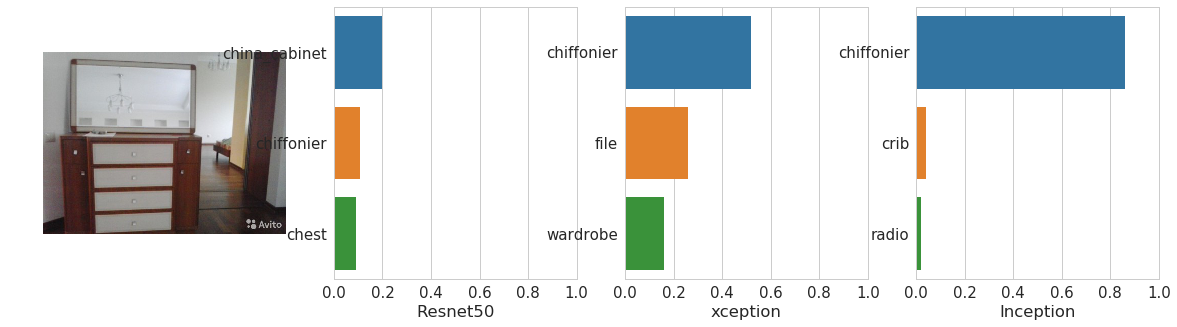

In [47]:
classify_and_plot(image_files[10])

In [48]:
def classify_inception(image_path):
    """Classify image and return top match."""
    img = Image.open(image_path)
    target_size = (224, 224)
    if img.size != target_size:
        img = img.resize(target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = inception_v3.preprocess_input(x)
    preds = inception_model.predict(x)
    return inception_v3.decode_predictions(preds, top=1)[0][0]

def image_id_from_path(path):
    return path.split('/')[3].split('.')[0]

In [8]:
train = pd.read_csv('/home/vishy/Desktop/Kaggle/Avito/Data/train.csv')
# test = pd.read_csv('/home/vishy/Desktop/Kaggle/Avito/Data/test.csv')

In [10]:
train['desc_len'] = train['description'].str.len()
train['title_len'] = train['title'].str.len()

In [49]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#plt.figure(figsize=(10, 10))
inception_conf = [[image_id_from_path(x), classify_inception(x)[2]] for x in image_files]
confidence = pd.DataFrame(inception_conf, columns=['image', 'image_confidence'])
#df = confidence.merge(train, on='image')

#corr = df[['image', 'image_confidence', 'desc_len', 'title_len']].corr()
#sns.heatmap(corr, annot=True)
#plt.xticks(rotation=30)
#plt.yticks(rotation=30)
#plt.title('Correlation Between Deal Probability and Strong Model Predictors')
#plt.show()

In [50]:
df.shape

(1390832, 3)

In [51]:
confidence.shape

(465829, 2)

In [52]:
confidence.head()

,image,image_confidence
0,Desktop,0.993957
1,Desktop,0.437780
2,Desktop,0.251597
3,Desktop,0.884551
4,Desktop,0.396152


In [53]:
print(type(inception_conf), len(inception_conf))
print(type(image_files), len(image_files))

<class 'list'> 465829
<class 'list'> 465829


In [54]:
df = pd.DataFrame(list(zip(image_files, inception_conf)), columns=['image','Inception_conf'])
print(df.shape)
df.head()

(465829, 2)


,image,Inception_conf
0,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.9939567]"
1,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.43778014]"
2,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.25159696]"
3,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.88455135]"
4,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.39615166]"


In [55]:
df['image1'] = df['image'].str[48:]

In [56]:
df.head()

,image,Inception_conf,image1
0,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.9939567]",269ee096ba9840a75a1d6a18a56e6d832b28b00239a203...
1,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.43778014]",1710a79cf49ae120d18cc308a006a37eca5bd0e137b7af...
2,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.25159696]",4b008969b91d5393731abbf90872179c9c225e5b6444ab...
3,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.88455135]",7dd27eee8b80a30e19cc54974714f67785c03c254b276b...
4,/home/vishy/Desktop/Kaggle/Avito/Data/test_jpg...,"[Desktop, 0.39615166]",03284c8d47437986dc86e508d92d4128753070ade6712a...


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [70]:
# Code to integrate Inception score into main train dataframe
imgpath = '/home/vishy/Desktop/Kaggle/Avito/Data/image_features/'
path = '/home/vishy/Desktop/Kaggle/Avito/Data/'
#df.to_csv('test_inc_image_feat.csv', index= False)
train_incp = pd.read_csv(imgpath+'train_inc_image_feat.csv')
train = pd.read_csv(path+'train.csv')
# include image dullness
train_dull = pd.read_csv(imgpath+'train_img_features_dull.csv')

In [71]:
train_incp.head()

,image,Inception_conf,image1
0,/home/vishy/Desktop/Kaggle/Avito/Data/train_jpg/77582f51800ed0c9e99bfca0b7dd038f0d70c8f3cbed3b746776f5fe70d7508c.jpg,"['Desktop', 0.9994741]",77582f51800ed0c9e99bfca0b7dd038f0d70c8f3cbed3b746776f5fe70d7508c.jpg
1,/home/vishy/Desktop/Kaggle/Avito/Data/train_jpg/f2a5a89b4fbed4a34ed831c96a06920ebfbdb9a2f1a9b6e58ffd34548cca04a3.jpg,"['Desktop', 0.9769642]",f2a5a89b4fbed4a34ed831c96a06920ebfbdb9a2f1a9b6e58ffd34548cca04a3.jpg
2,/home/vishy/Desktop/Kaggle/Avito/Data/train_jpg/1a1863a27f71c76463ee90ea4e6b5bff81c0726c0c92c447db60c3d0dfec4576.jpg,"['Desktop', 0.27276486]",1a1863a27f71c76463ee90ea4e6b5bff81c0726c0c92c447db60c3d0dfec4576.jpg
3,/home/vishy/Desktop/Kaggle/Avito/Data/train_jpg/cc3d6ed32168ada132cb8341b63a8c0b1d5ecd2fe7e27cd373e879faf80b4602.jpg,"['Desktop', 0.33036762]",cc3d6ed32168ada132cb8341b63a8c0b1d5ecd2fe7e27cd373e879faf80b4602.jpg
4,/home/vishy/Desktop/Kaggle/Avito/Data/train_jpg/805547905a5950b81b0f988b7b318989dd89968665564ee459cf9d1eda0a904d.jpg,"['Desktop', 0.9999635]",805547905a5950b81b0f988b7b318989dd89968665564ee459cf9d1eda0a904d.jpg


In [72]:
del train_incp['image']
train_incp['incp_score'] = (train_incp['Inception_conf'].str[12:-1]).astype(float)
train_incp['image'] = (train_incp['image1'].str[:-4]).astype(str)
del train_incp['image1'],train_incp['Inception_conf']
train_incp = train_incp[['image','incp_score']]

In [73]:
train_incp.head()

,image,incp_score
0,77582f51800ed0c9e99bfca0b7dd038f0d70c8f3cbed3b746776f5fe70d7508c,0.999474
1,f2a5a89b4fbed4a34ed831c96a06920ebfbdb9a2f1a9b6e58ffd34548cca04a3,0.976964
2,1a1863a27f71c76463ee90ea4e6b5bff81c0726c0c92c447db60c3d0dfec4576,0.272765
3,cc3d6ed32168ada132cb8341b63a8c0b1d5ecd2fe7e27cd373e879faf80b4602,0.330368
4,805547905a5950b81b0f988b7b318989dd89968665564ee459cf9d1eda0a904d,0.999964


In [74]:
train_dull.head()

,image,dullness
0,77582f51800ed0c9e99bfca0b7dd038f0d70c8f3cbed3b746776f5fe70d7508c.jpg,17.61
1,f2a5a89b4fbed4a34ed831c96a06920ebfbdb9a2f1a9b6e58ffd34548cca04a3.jpg,0.00
2,1a1863a27f71c76463ee90ea4e6b5bff81c0726c0c92c447db60c3d0dfec4576.jpg,0.00
3,cc3d6ed32168ada132cb8341b63a8c0b1d5ecd2fe7e27cd373e879faf80b4602.jpg,0.00
4,805547905a5950b81b0f988b7b318989dd89968665564ee459cf9d1eda0a904d.jpg,17.73


In [75]:
train['image']=train['image'].astype(str)
train_dull['image1']=train_dull['image'].str[:-4].astype(str)
del train_dull['image']
train_dull.columns = ['dullness','image']
train_dull = train_dull[['image','dullness']]

In [76]:
train_dull.head()

,image,dullness
0,77582f51800ed0c9e99bfca0b7dd038f0d70c8f3cbed3b746776f5fe70d7508c,17.61
1,f2a5a89b4fbed4a34ed831c96a06920ebfbdb9a2f1a9b6e58ffd34548cca04a3,0.00
2,1a1863a27f71c76463ee90ea4e6b5bff81c0726c0c92c447db60c3d0dfec4576,0.00
3,cc3d6ed32168ada132cb8341b63a8c0b1d5ecd2fe7e27cd373e879faf80b4602,0.00
4,805547905a5950b81b0f988b7b318989dd89968665564ee459cf9d1eda0a904d,17.73


In [77]:
pd.options.display.max_colwidth = 200

In [78]:
train = train[['image','image_top_1','deal_probability']]

In [79]:
train.head()

,image,image_top_1,deal_probability
0,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19,1008.0,0.12789
1,79c9392cc51a9c81c6eb91eceb8e552171db39d71427001e1e0859c0fb843a31,692.0,0.00000
2,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a8713f112c67e29bb42,3032.0,0.43177
3,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c841302bf49820803501b4b,796.0,0.80323
4,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2c089d8376e883ed33b,2264.0,0.20797


In [25]:
train.image.value_counts().head(1)

nan    112588
Name: image, dtype: int64

In [80]:
train['image'] = train.image.replace({'4f029e2a00e892aa2cac27d98b52ef8b13d91471f613c8d3c38e3f29d4da0b0c.jpg': '',
                                     '8513a91e55670c709069b5f85e12a59095b802877715903abef16b7a6f306e58.jpg': '',
                                     '60d310a42e87cdf799afcd89dc1b11ae3fdc3d0233747ec7ef78d82c87002e83.jpg': '',
                                     'b98b291bd04c3d92165ca515e00468fd9756af9a8f1df42505deed1dcfb5d7ae.jpg': ''}, regex=True)

In [81]:
train.image.value_counts().head(1)

nan    112588
Name: image, dtype: int64

In [82]:
df = train.merge(train_dull, how='left', on='image')#, right_on='image'
df.head()

,image,image_top_1,deal_probability,dullness
0,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19,1008.0,0.12789,0.000
1,79c9392cc51a9c81c6eb91eceb8e552171db39d71427001e1e0859c0fb843a31,692.0,0.00000,6.335
2,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a8713f112c67e29bb42,3032.0,0.43177,0.000
3,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c841302bf49820803501b4b,796.0,0.80323,0.000
4,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2c089d8376e883ed33b,2264.0,0.20797,7.715


In [83]:
df = df.merge(train_incp, how='left', on='image')#, right_on='image'
df.head()

,image,image_top_1,deal_probability,dullness,incp_score
0,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c7679f17c333c959b19,1008.0,0.12789,0.000,0.906946
1,79c9392cc51a9c81c6eb91eceb8e552171db39d71427001e1e0859c0fb843a31,692.0,0.00000,6.335,0.635175
2,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a8713f112c67e29bb42,3032.0,0.43177,0.000,0.720803
3,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c841302bf49820803501b4b,796.0,0.80323,0.000,0.413566
4,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2c089d8376e883ed33b,2264.0,0.20797,7.715,0.288300


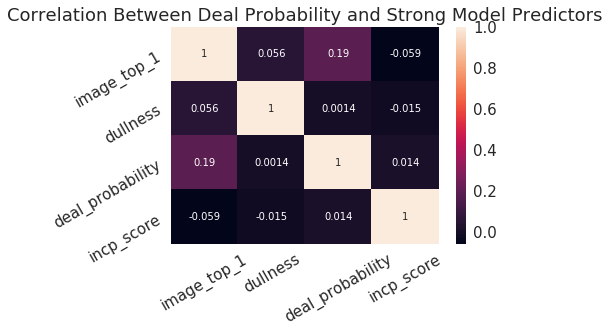

In [87]:
corr = df[['image','image_top_1','dullness','deal_probability','incp_score']].corr()
sns.heatmap(corr, annot=True)
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.title('Correlation Between Deal Probability and Strong Model Predictors')
plt.show()

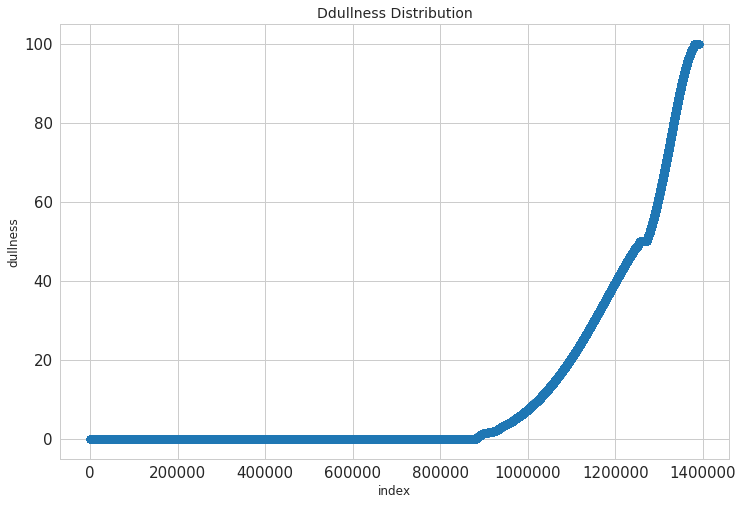

In [90]:
plt.figure(figsize=(12,8))
plt.scatter(range(df.shape[0]), np.sort(df['dullness'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('dullness', fontsize=12)
plt.title("Ddullness Distribution", fontsize=14)
plt.show()

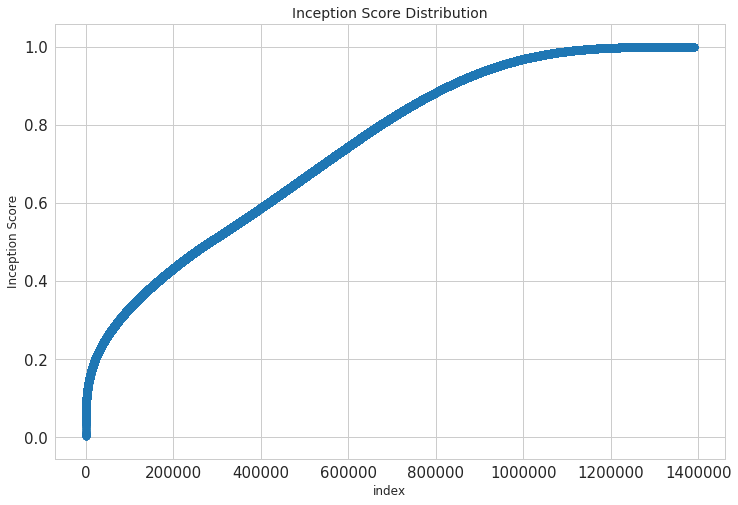

In [91]:
plt.figure(figsize=(12,8))
plt.scatter(range(df.shape[0]), np.sort(df['incp_score'].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Inception Score', fontsize=12)
plt.title("Inception Score Distribution", fontsize=14)
plt.show()